In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
import numpy as np 
import pandas as pd 
import scipy 

import configparser 
import datetime 
import glob 

from scipy import signal 

import time 

import sys 
print(sys.version, sys.platform, sys.executable) 

%matplotlib inline

mpl.rcParams.update({'font.size': 14})  
mpl.rcParams.update({'axes.facecolor':'w'}) 
mpl.rcParams.update({'axes.edgecolor':'k'}) 
mpl.rcParams.update({'figure.facecolor':'w'}) 
mpl.rcParams.update({'figure.edgecolor':'w'}) 
mpl.rcParams.update({'axes.grid':True}) 
mpl.rcParams.update({'grid.linestyle':':'}) 
mpl.rcParams.update({'figure.figsize':[12,9]}) 
# fig, axs = plt.subplots(figsize=(14,2)) 

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0] linux /usr/bin/python3


In [2]:
import mkid_pylibs as klib

%load_ext autoreload
%autoreload 2

# KID PSD

In [5]:
## SG FREQ
lo = "4.99GHz"
dir0 = "/data/gb/kiddata/20200103/data_145643/"

## SWPDATASET
sfp0 = glob.glob(dir0+"/swp*GB01*.rawdata")[0]
## TODDATASET
tfp0 = glob.glob(dir0+'/tod*GB01*.rawdata')
print(sfp0)
print(tfp0)

swpset = klib.readfile_swp('rhea',sfp0,-1,lo)
todset = klib.multreadfile_tod('rhea',tfp0,lo)

kr = [
    klib.kidana_psd.PSDAnalyzer(swp=swpset[0], tod=todset[0], ctod=todset[1]),
    klib.kidana_psd.PSDAnalyzer(swp=swpset[2], tod=todset[2], ctod=todset[3]),
    klib.kidana_psd.PSDAnalyzer(swp=swpset[4], tod=todset[4], ctod=todset[5]),
]

for ik in kr:
    ik.fitIQ(nfwhm=3)
    ik.calcpsd(dofit=False)

/data/gb/kiddata/20200103/data_145643/swp_GB01.rawdata
['/data/gb/kiddata/20200103/data_145643/tod_GB01_1KSPS.rawdata', '/data/gb/kiddata/20200103/data_145643/tod_GB01_100KSPS.rawdata', '/data/gb/kiddata/20200103/data_145643/tod_GB01_1000KSPS.rawdata']
ADD PARAM -> arga                 : <class 'inspect._empty'>
ADD PARAM -> absa                 : <class 'inspect._empty'>
ADD PARAM -> tau                  : <class 'inspect._empty'>
ADD PARAM -> fr                   : <class 'inspect._empty'>
ADD PARAM -> Qr                   : <class 'inspect._empty'>
ADD PARAM -> Qc                   : <class 'inspect._empty'>
ADD PARAM -> phi0                 : <class 'inspect._empty'>
ADD PARAM -> c                    : <class 'inspect._empty'>
ADD PARAM DEFAULT -> arga                 : -0.39914613531822163
ADD PARAM DEFAULT -> absa                 : 0.08027552968189391
ADD PARAM DEFAULT -> tau                  : 6.61764407213108e-07
ADD PARAM DEFAULT -> fr                   : 4906304000.0
ADD PARA

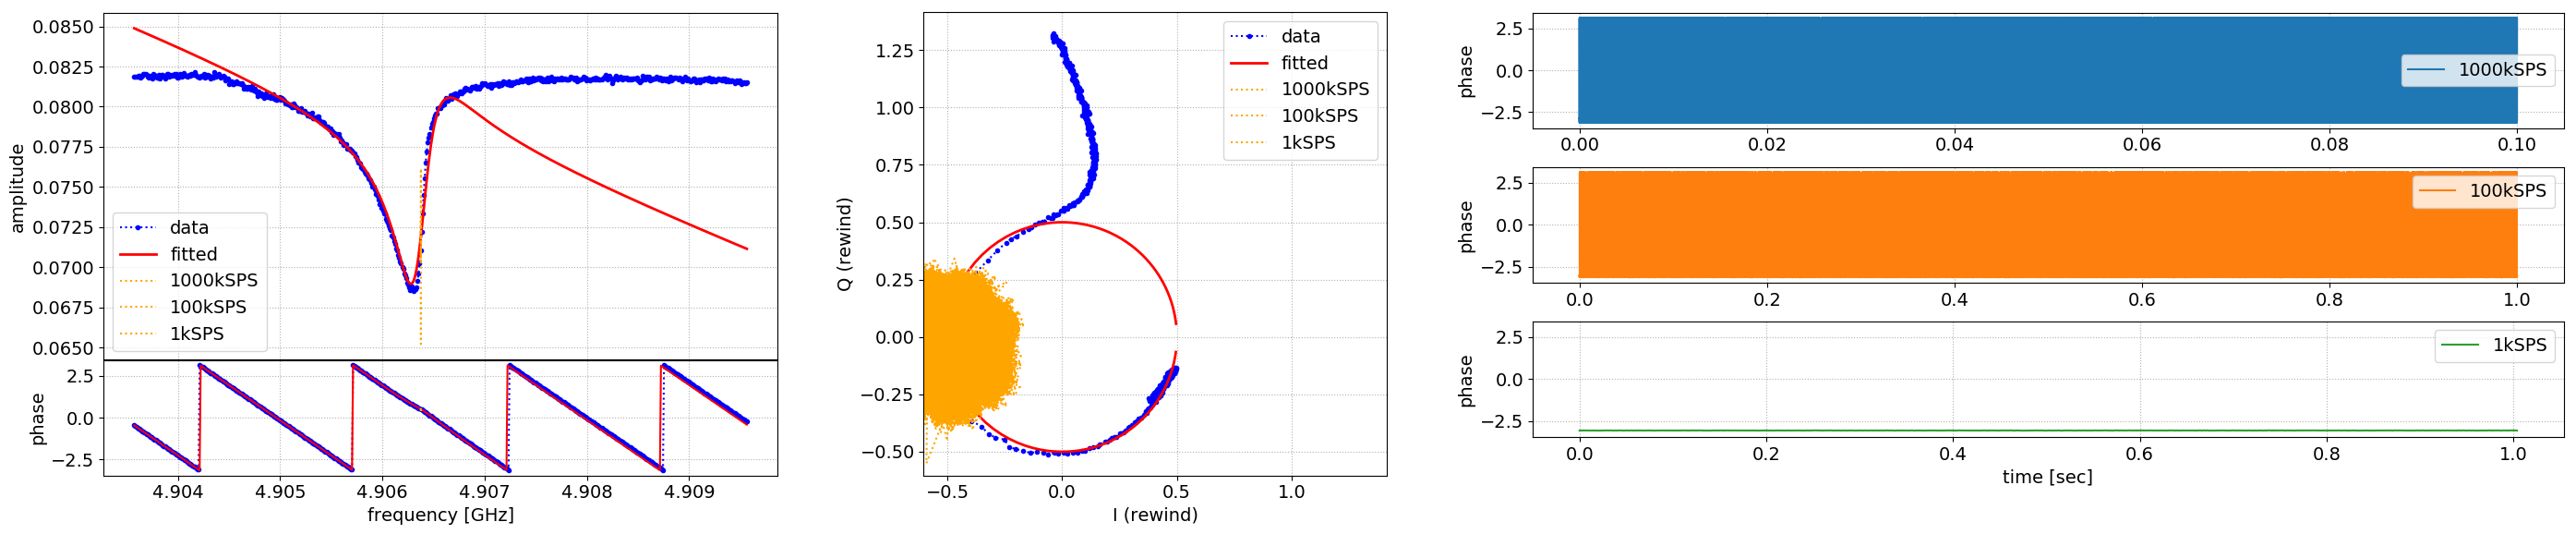

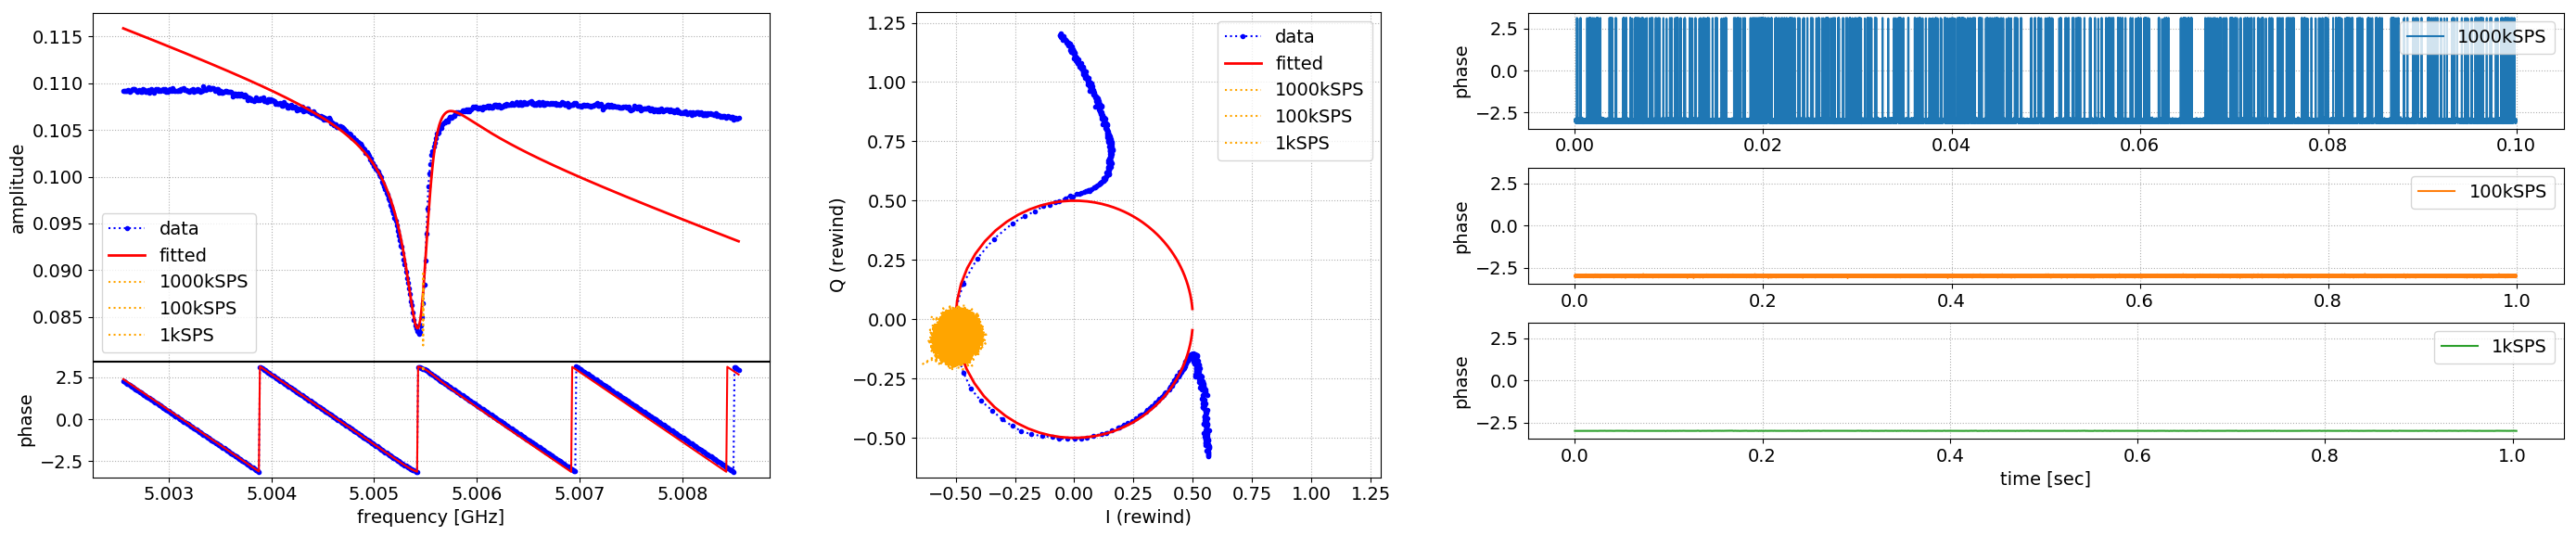

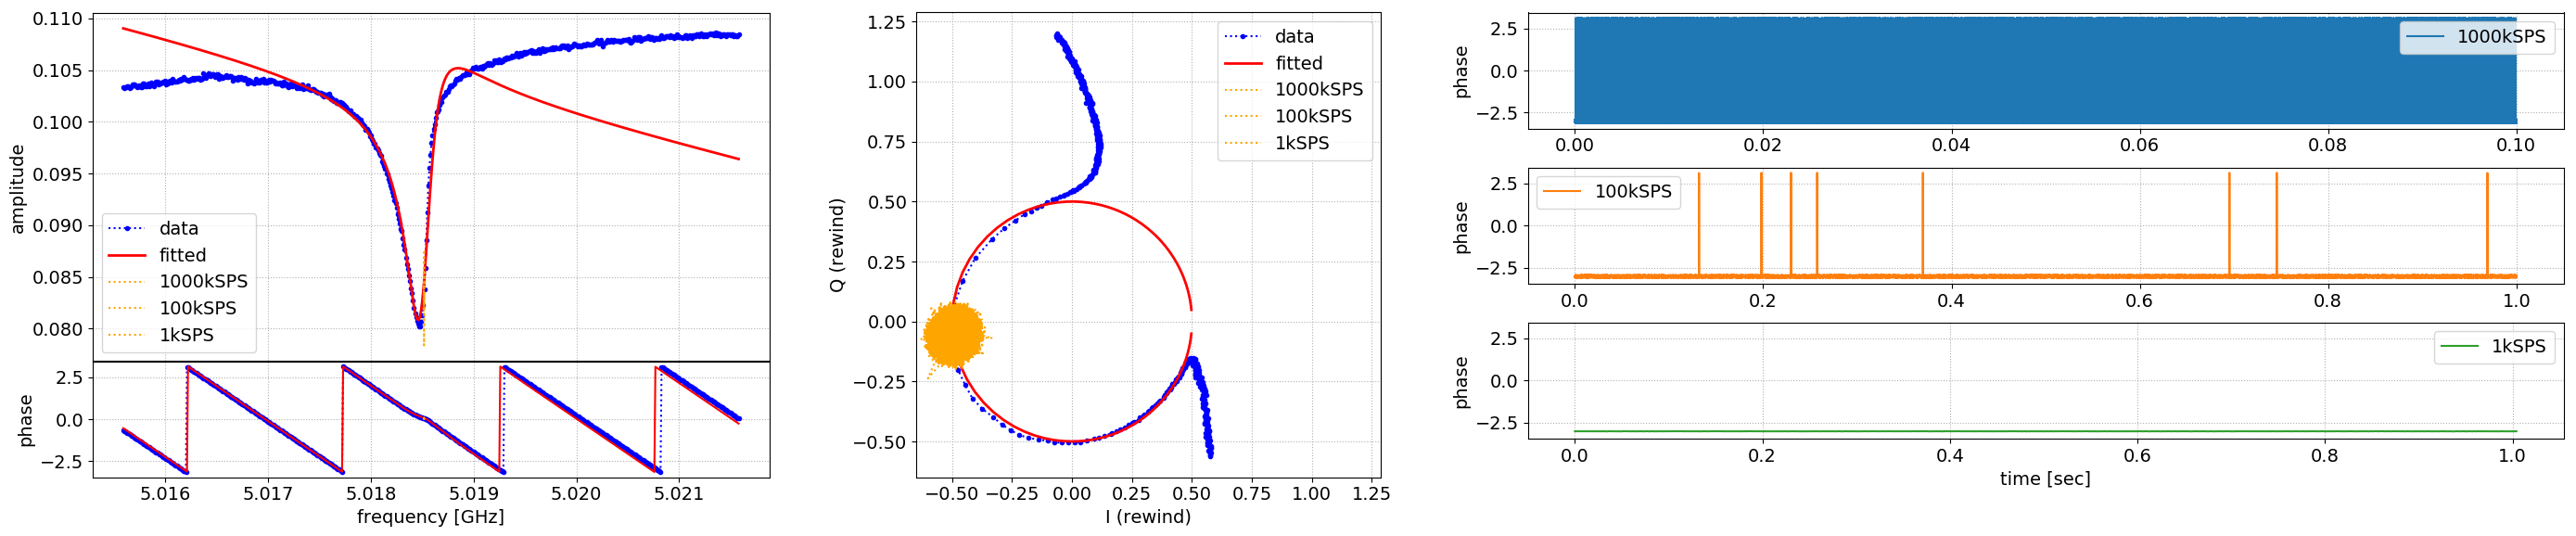

In [10]:
for ik in kr:
    klib.plotter.plotSwpTOD(ik.swp,ik.todlist)

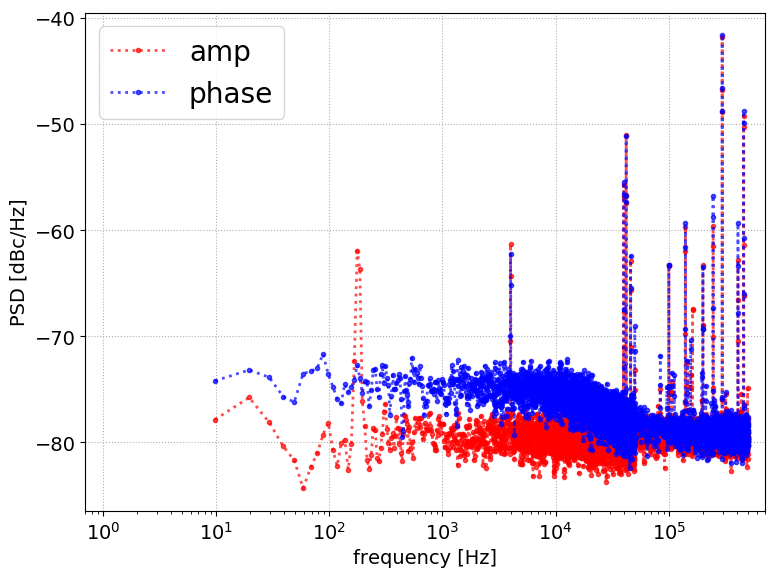

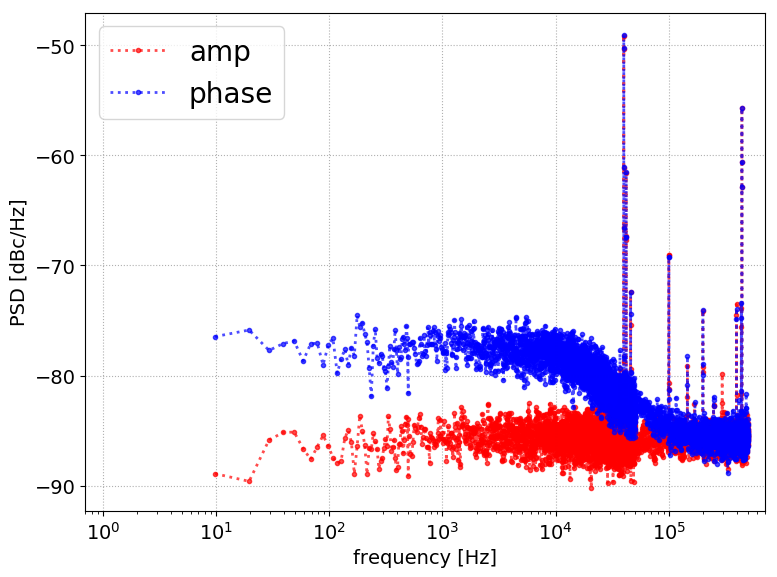

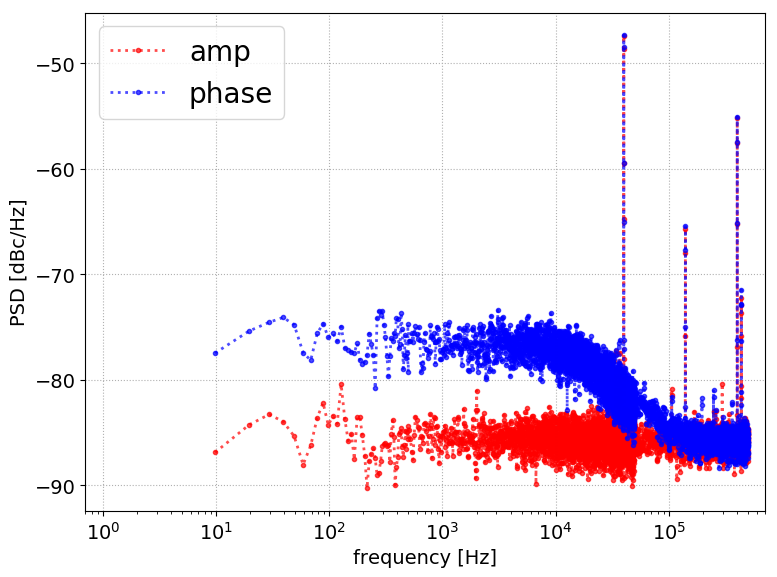

In [11]:
for ik in kr:
    klib.plotter.plotPSD(ik.psd)

# Observation

In [12]:
## SG FREQ

dirs = []
dirs.append("/data/gb/kiddata/20200107/data_221917/")

k = []
for v in dirs:
    lo = "4.99GHz"
    ## SWPDATASET
    sfp0 = glob.glob(v+"/swp*GB01*.rawdata")[0]
    ## TODDATASET
    tfp0 = glob.glob(v+'/tod*GB01*.rawdata')[0]

    swpset = klib.readfile_swp('rhea',sfp0,-1,lo)
    todset = klib.readfile_tod('rhea',tfp0,-1,lo,nmax=100000)

    k.append(klib.kidana.KidAnalyzer(swp=swpset[0], tod=todset[0], ctod=todset[1]))
    k.append(klib.kidana.KidAnalyzer(swp=swpset[2], tod=todset[2], ctod=todset[3]))
    k.append(klib.kidana.KidAnalyzer(swp=swpset[4], tod=todset[4], ctod=todset[5]))
    k.append(klib.kidana.KidAnalyzer(swp=swpset[6], tod=todset[6], ctod=todset[7]))

for ik in k:
    ik.fitIQ(nfwhm=3)

ADD PARAM -> arga                 : <class 'inspect._empty'>
ADD PARAM -> absa                 : <class 'inspect._empty'>
ADD PARAM -> tau                  : <class 'inspect._empty'>
ADD PARAM -> fr                   : <class 'inspect._empty'>
ADD PARAM -> Qr                   : <class 'inspect._empty'>
ADD PARAM -> Qc                   : <class 'inspect._empty'>
ADD PARAM -> phi0                 : <class 'inspect._empty'>
ADD PARAM -> c                    : <class 'inspect._empty'>
ADD PARAM DEFAULT -> arga                 : 2.125078766776518
ADD PARAM DEFAULT -> absa                 : 0.11066550766223718
ADD PARAM DEFAULT -> tau                  : 6.618555691068727e-07
ADD PARAM DEFAULT -> fr                   : 4907144000.0
ADD PARAM DEFAULT -> Qr                   : 16357.146666666667
ADD PARAM DEFAULT -> Qc                   : 16357.146666666667
ADD PARAM DEFAULT -> phi0                 : 0
ADD PARAM DEFAULT -> c                    : 0
ADD PARAM DEFAULT -> Qi                   : <

/usr/lib/python3/dist-packages/lmfit/astutils.py:159: RuntimeWarning: divide by zero encountered in double_scalars
  ast.Div: lambda a, b: a / b,


# HOW TO READ DATA

`ik = k[0]`

## freq
- `ik.tod.f`

## rate
- `ik.tod.rate`

## time
- `ik.tod.time`

## phase
- `ik.tod.data.phase` # raw data
- `ik.tod.rwdata.phase` # rewinded data
- `ik.tod.mdata.phase` # modified data (on/off subtractions for removing common noise)
- `ik.tod.rwmdata.phase` # rewined modified data

### Corrected phase

phase is better to be re-defined to avoid the jump btw -pi and pi.

--> Use corphase instead of phase in rewinded data.

- `ik.tod.rwdata.corphase` # rewinded data + redefined phase
- `ik.tod.rwmdata.corphase` # rewinded modified data + redefined phase <-- This is nominal data to be used in the analysis

### Linearization
If large signals are detected in KIDs, they could be non-linear responces.

This could be corrected by the linearization function

- `ik.tod.rwmdata.lincorphase` # rewinded modified data + redefined phase + linearization


## amplitude
- `ik.tod.data.amplitude` # raw data
- `ik.tod.rwdata.amplitude` # rewinded data
- `ik.tod.mdata.amplitude` # modified data (on/off subtractions for removing common noise)
- `ik.tod.rwmdata.amplitude` # rewined modified data

### Normalization

After rewinding, the radius of amplitude is 0.5.

It might be better to define normalized amplitude (such as for the PSD calculation)

- `ik.tod.rwdata.coramplitude` # rewinded data + normalized
- `ik.tod.rwmdata.coramplitude` # rewinded data + normalized


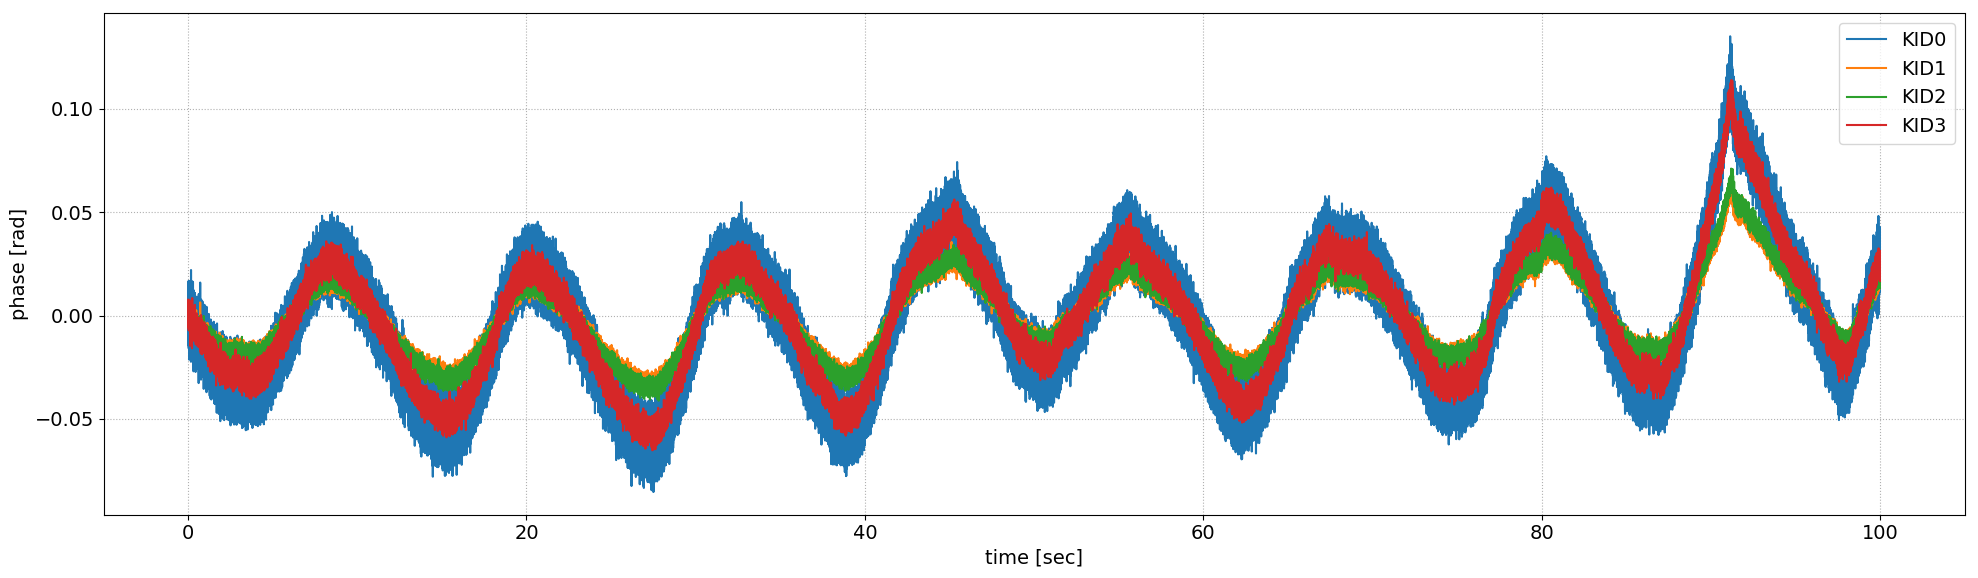

In [14]:
fig,ax = klib.misc.make_figure(fsz=(20,6))

for i,ik in enumerate(k):
    ax.plot(ik.tod.time, ik.tod.rwmdata.corphase - np.mean(ik.tod.rwmdata.corphase[:100]), label=f'KID{i}', marker='', ls='-')

ax.legend()

ax.set_xlabel('time [sec]')
ax.set_ylabel('phase [rad]')
klib.misc.adj_figure(fig)